## Задание №3

Обучить на своих данных: 1) random forests, 2) extremely random forests, 3) adaboost, 4) gradient boosted trees. Построить графики зависимости ошибки (на тестовой и обучающейся выборках, а также oob-ошибку) от количества используемых деревьев. Ответить на вопрос - Наблюдается ли переобучение/недообучение?

In [2]:
# Загружаем данные:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url = 'https://github.com/OlyaKotova/MachineLearning/tree/master/Data_Cortex_Nuclear(csv).csv'
data = pd.read_csv(url, sep = ',', engine = 'python')

In [5]:
# Заполнение пустых
data.count(axis = 0)

MouseID            1080
DYRK1A_N           1077
ITSN1_N            1077
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1077
pBRAF_N            1077
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1077
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1077
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1073
TRKA_N             1077
                   ... 
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N              1080
GFAP_N             1080
GluR3_N            1080
GluR4_N            1080
IL1B_N             1080
P3525_N         

Есть пропущеные значения.

In [6]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [8]:
# удаление столбцов
data = data.drop('Genotype', axis = 1)  # повотряется
data = data.drop('Treatment', axis = 1) # повотряется
data = data.drop('Behavior', axis = 1)  # повотряется
    
data = data.drop('MouseID', axis = 1)   # индетификатор

In [10]:
X = data.drop(('class'), axis = 1)
y = data['class']

In [11]:
print(X.shape)
print(y.shape)

(1080, 77)
(1080,)


In [13]:
# Разбиваем данные на обучающую и тестовую выборки:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)
N_test, _ = X_test.shape

## Random Forest

In [14]:
# Проведем обучение Random Forest классификатора на тренировочной выборке с параметром
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 25) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
# Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.037037037037


Ошибка на обучающей выборке оказалась меньше ошибки на тестовой выборке => переобучение. Попробуем подобрать более удачное число деревьев.

Строим зависимость числа ошибок (тестовая и обучающей выборки) от числа деревьев.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This p

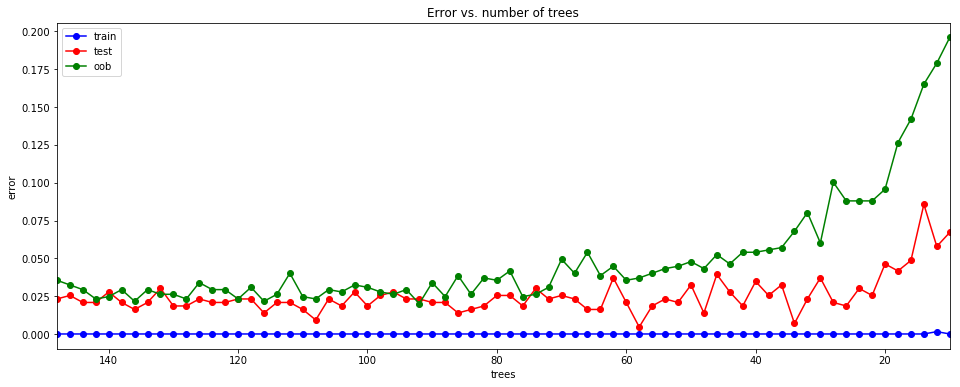

In [19]:
# Вычислим значения ошибок для различных деревьев
trees_arr = np.arange(10, 150, 2)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)
    
# Построим график величины ошибки от количества деревьев
plt.figure(figsize = (16, 6))
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

In [20]:
# Минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.00462962962963


Переобучение мало, ошибка стала меньше.

In [21]:
# Оптимальное количество деревьев:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[58]


Переобучение сохраняется везде, но наименьшее знание ошибки достигается на 58-х деревьях.

## Extremely Randomized Trees

In [22]:
# Обучаем классификатор вида Extremely Randomized Trees
ert = ensemble.ExtraTreesClassifier(n_estimators = 50) # n_estimators = 50 (кол-во построенных деревьев)
ert.fit(X_train, y_train)

# Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.00462962962963


Можно заметить переобучение. График ошибок на тестовой выборке, обучающей выборке; OOB-ошибка зависящая от числа деревьев:

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This p

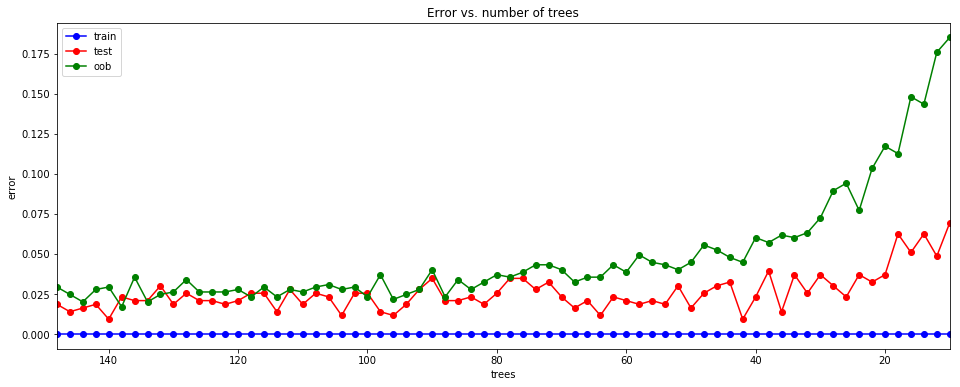

In [23]:
# Вычислим значения ошибок для различных деревьев
trees_arr = np.arange(10, 150, 2)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)
    
# Построим график величины ошибки от количества деревьев
plt.figure(figsize = (16, 6))
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Не получилось добиться лучшего результата, наблюдается переобучение. 
Посмотрим на значение ошибки:

In [24]:
# Минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.00925925925926


 Ошибка почти в два раза больше чем в предыдущем методе.

In [25]:
# Оптимальное количество деревьев:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 42 140]


## Adaboost

In [30]:
# Разобъем данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

In [31]:
# Обучаем классификатор вида AdaBoost
ab = ensemble.AdaBoostClassifier(n_estimators = 50) # n_estimators = 50 (кол-во классификаторов)
ab.fit(X_train, y_train)

# Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.671296296296
Ошибка на тестовой выборке:  0.726851851852


 Наблюдаем переобучение и большую вероятность ошибки.

 Построим график зависимости ошибок:

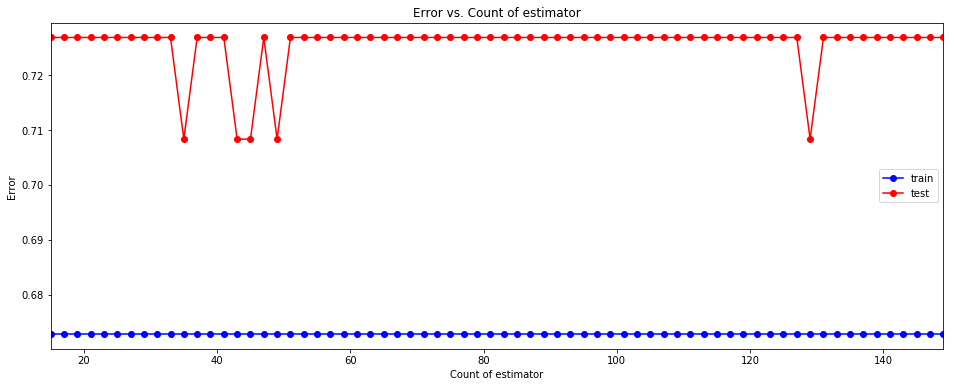

In [32]:
# Вычислим значения ошибок для различного количества классификаторов
estimator_arr = np.arange(15, 150, 2)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))
    
# Построим график величины ошибок
plt.figure(figsize = (16, 6))
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

 Переобучение сохраняется везде, но есть несколько значений минимумов.

In [33]:
# Минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.672839506173
Минимальная ошибка на тестовой выборке:  0.708333333333


Ошибки имеют большое значение, хотя и близки.

In [34]:
# Оптимальное количество классификаторов:
estimator_opt = estimator_arr[test_err == min_test_err]
print(estimator_opt)

[ 35  43  45  49 129]


## Gradient Boosted Trees

In [36]:
# Разобъем даные немного по другому
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [38]:
# Обучаем классификатор вида AdaBoost
gbt = ensemble.GradientBoostingClassifier(n_estimators = 50) # n_estimators = 50 (кол-во деревьев)
gbt.fit(X_train, y_train)

# Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.0432098765432


 Наблюдаем переобучение. Построим график зависимости ошибок.

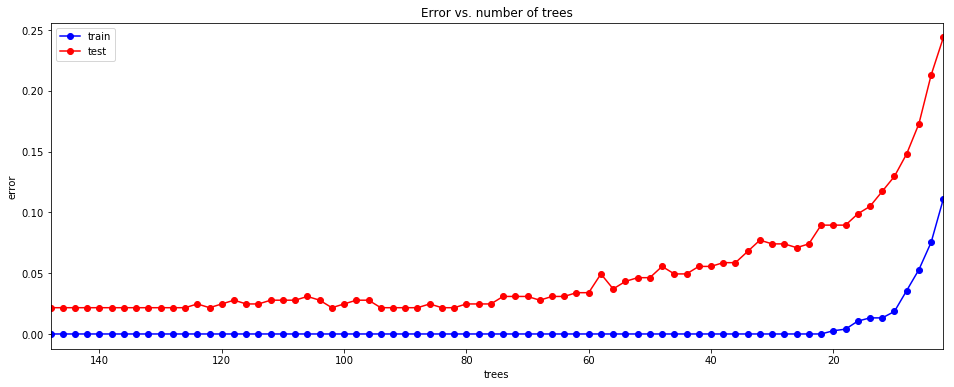

In [40]:
# Вычислим значения ошибок для различного количества деревьев
trees_arr = np.arange(2, 150, 2)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))
# Построим график величины ошибок
plt.figure(figsize = (16, 6))
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Узнаем значения минимумов

In [41]:
# Минимальное значение ошибки:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.0
Минимальная ошибка на тестовой выборке:  0.0216049382716


Ошибка стала меньше, несмотря на небольшое переобучение.

In [42]:
# Оптимальное количество деревьев:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 82  84  88  90  92  94 102 122 126 128 130 132 134 136 138 140 142 144
 146 148]


Выводы:
Минимальное значение ошибки достигается при алгоритме Random forest, но есть переобучение (на обучающей выборке:  0.0, на тестовой выборке:  0.00462962962963). 
Ошибка в два раза больше наблюдается у Extremely Randomized Trees, а у Gradient Boosted Trees в три раза больше. 
У алгоритма Adaboost ошибки имеют большое значение. 